In [1]:
import itertools #outputs of CNN
import matplotlib.pyplot as plt

import cv2 # open images with python
import numpy as np #numpy-expand_dims

import tensorflow as tf #mail DL architecture
from tensorflow.keras.models import load_model,Sequential


In [2]:
#Load up the existing model
model = load_model('./imageclassifier.h5')

In [4]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [5]:
model.layers

In [6]:
model.layers[0]

In [7]:
model.get_layer('conv2d')

In [8]:
model.get_layer('conv2d_2')

In [11]:
#grab first 3 layers
#Trained intermediate layers
#we can take these layers and use somewhere else also
intermediate_layers = model.layers[:3]

In [12]:
intermediate_layers
#right now we can't use these layers t predict something

In [13]:
#intermediate model with trained existing layers
intermediate_model = Sequential(intermediate_layers)


In [14]:
#the intermediate model is now represented as just the X layers that we took
intermediate_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
_________________________________________________________________


In [15]:
#checking what type of input the model takes
intermediate_model.input_shape

(None, 256, 256, 3)

In [16]:
#load img
image = cv2.imread('img1.jpg')
resize = cv2.resize(image,(256,256))


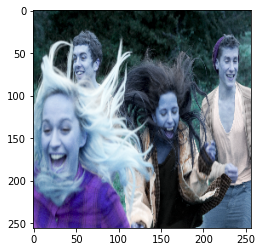

In [25]:
plt.imshow(resize)
#bluness due to opencv reading as BGR and matplot reading as RGB

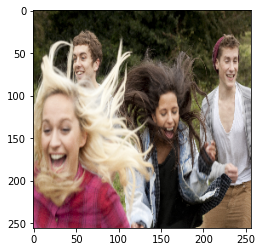

In [26]:
#color conversion in  opencv
plt.imshow(cv2.cvtColor(resize,cv2.COLOR_BGR2RGB))

In [17]:

#view shape of resized img
resize.shape

(256, 256, 3)

In [18]:
#make a prediction
intermediate_model.predict(resize)

ValueError: in user code:

    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Python39\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "c:\Python39\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Python39\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 256, 256, 3), found shape=(32, 256, 3)


In [22]:
resized2 = np.expand_dims(resize,0)
resized2.shape

(1, 256, 256, 3)

In [23]:
#we we make prediction using predict function it expects us to pass through a batch of data 

yhat = intermediate_model.predict(np.expand_dims(resize,0))

In [24]:
yhat.shape

(1, 125, 125, 32)

In [28]:
#extract only 1 filter
yhat[0,:,:,0].shape

(125, 125)

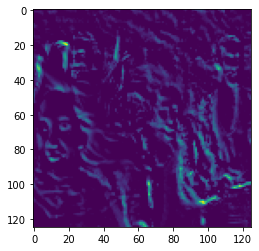

In [29]:
#output from 1 CNN
plt.imshow(yhat[0,:,:,0])

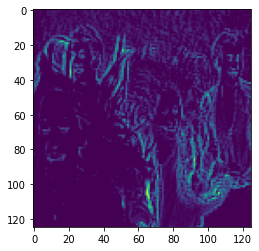

In [30]:
plt.imshow(yhat[0,:,:,30])

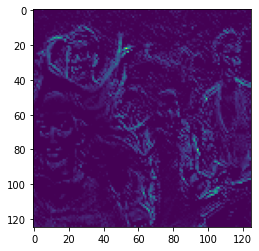

In [34]:
plt.imshow(yhat[0,:,:,5])

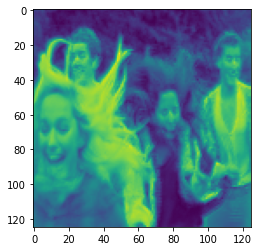

In [36]:
plt.imshow(yhat[0,:,:,31])

In [ ]:
#features like teeth,mouth,eyes are highlighted and might have been used by CNN to learn if that helps in determining happiness or sadness

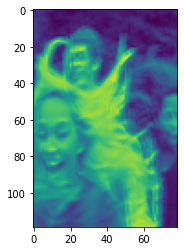

In [32]:
plt.imshow(yhat[0,1:120,1:80,20])

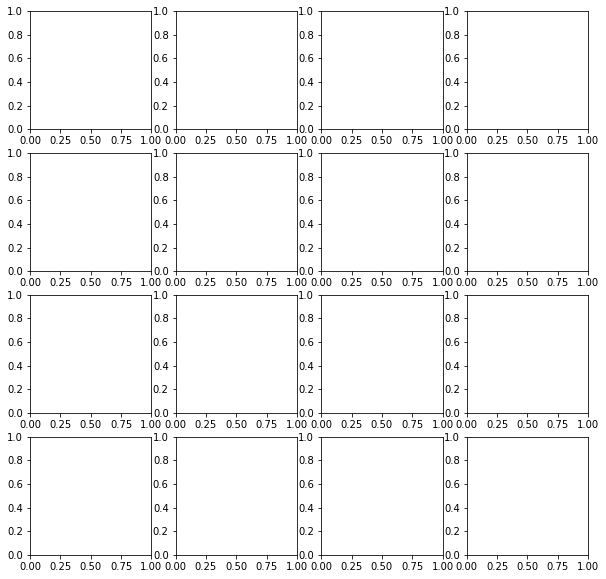

In [40]:
#Viz Grid -- visulaize multiple outputs at sametime
num_rows = 4
num_cols  = 4
#4X4 filter

fig,ax = plt.subplots(ncols=num_cols,nrows=num_rows,figsize=(10,10))




In [38]:
# itertools.product is used to generate all product combinations
for val in itertools.product([1,2,4],[5,6,7]):
    print(val)

(1, 5)
(1, 6)
(1, 7)
(2, 5)
(2, 6)
(2, 7)
(4, 5)
(4, 6)
(4, 7)


In [41]:
for val in itertools.product(range(num_cols),range(num_rows)):
    print(val)

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(3, 0)
(3, 1)
(3, 2)
(3, 3)


In [43]:
for idx,ax_idx in enumerate(list(itertools.product(range(num_cols),range(num_rows)))):
    print(yhat[0,:,:,idx])

[[3.3199794  0.         0.         ... 0.         0.         0.        ]
 [5.204796   7.5811834  8.107707   ... 0.         0.         0.        ]
 [1.6633214  0.         0.32870078 ... 0.         0.         2.9445565 ]
 ...
 [0.         0.         0.         ... 9.172157   4.750569   0.        ]
 [0.         0.         0.         ... 6.567526   0.10973002 0.        ]
 [0.         0.         0.         ... 5.179004   0.         0.        ]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[25.766321 28.862053 25.294151 ... 21.977186 17.021711 17.246374]
 [22.453327 23.281637 22.434654 ... 21.245695 21.516342 21.633871]
 [21.808939 17.917044 16.66599  ... 25.625584 27.571714 24.006092]
 ...
 [51.9178   45.5923   36.99465  ... 39.732784 45.108463 50.70318 ]
 [53.93017  41.655132 37.92032  ... 41.871967 46.683044 46.79713 ]
 [54.05689  43.49592  37.056267 ... 40.298717 45.529972 48.5

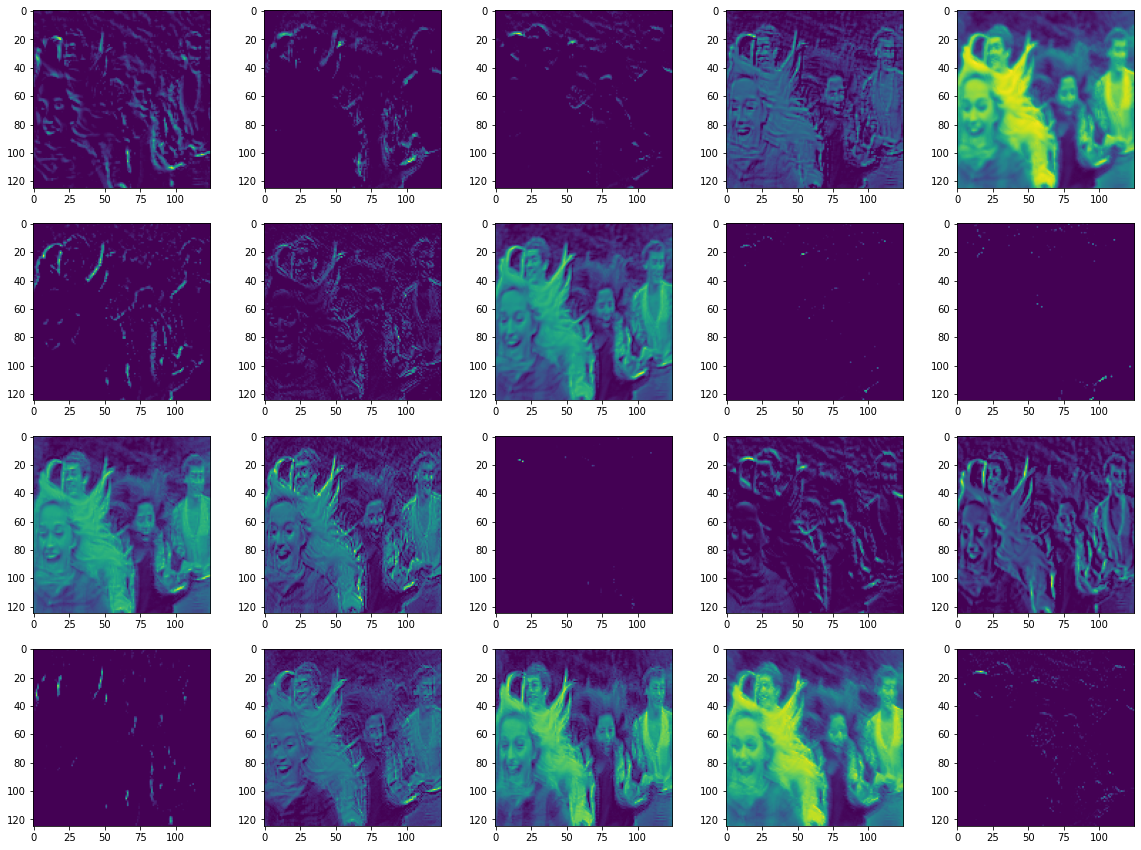

In [50]:

#Viz Grid -- visulaize multiple outputs at sametime
num_rows = 4
num_cols  = 5
#4X4 filter

fig,ax = plt.subplots(ncols=num_cols,nrows=num_rows,figsize=(20,15))

for idx,ax_idx in enumerate(list(itertools.product(range(num_cols),range(num_rows)))):
    ax[ax_idx[1],ax_idx[0]].imshow(yhat[0,:,:,idx])

In [51]:
image2 = cv2.imread('img2.jpg')
resize3 = cv2.resize(image2,(256,256))

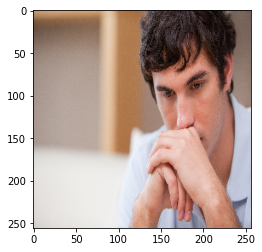

In [52]:

plt.imshow(cv2.cvtColor(resize3,cv2.COLOR_BGR2RGB))

In [53]:
resized3 = np.expand_dims(resize3,0)
resized3.shape

(1, 256, 256, 3)

In [54]:
yhat = intermediate_model.predict(np.expand_dims(resize3,0))

In [55]:
yhat[0,:,:,0].shape

(125, 125)

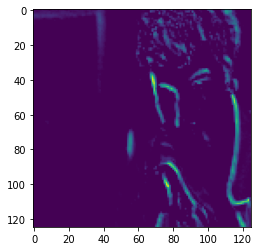

In [56]:
plt.imshow(yhat[0,:,:,0])

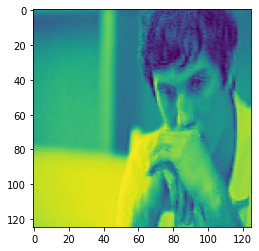

In [60]:
plt.imshow(yhat[0,:,:,11])
#maybe focuses on body language and eye and mouth not open

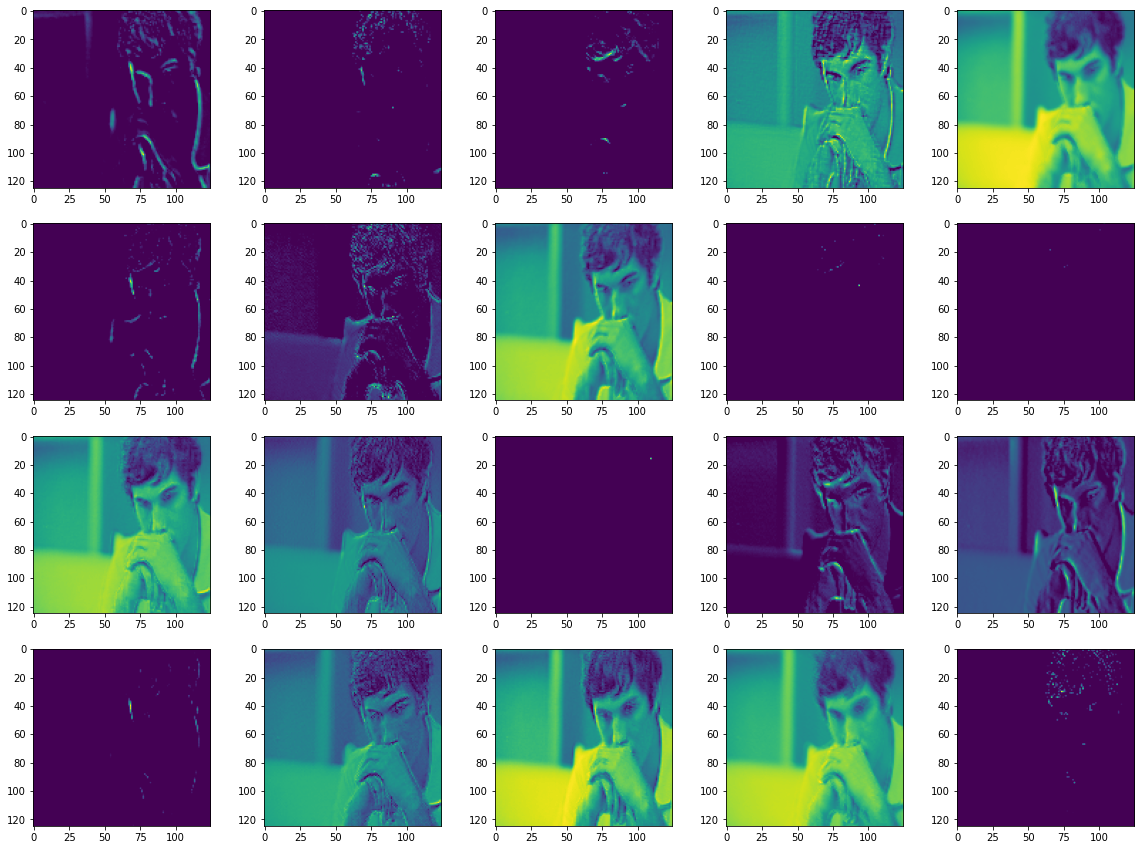

In [57]:
num_rows = 4
num_cols  = 5
#4X4 filter

fig,ax = plt.subplots(ncols=num_cols,nrows=num_rows,figsize=(20,15))

for idx,ax_idx in enumerate(list(itertools.product(range(num_cols),range(num_rows)))):
    ax[ax_idx[1],ax_idx[0]].imshow(yhat[0,:,:,idx])

In [62]:
#to visualize outputs from different layers just grab those layer
intermediate_layers = model.layers[:4]
intermediate_layers


In [65]:
intermediate_model = Sequential(intermediate_layers)
intermediate_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
Total params: 5,088
Trainable params: 5,088
Non-trainable params: 0
_________________________________________________________________


In [66]:
yhat = intermediate_model.predict(np.expand_dims(resize3,0))

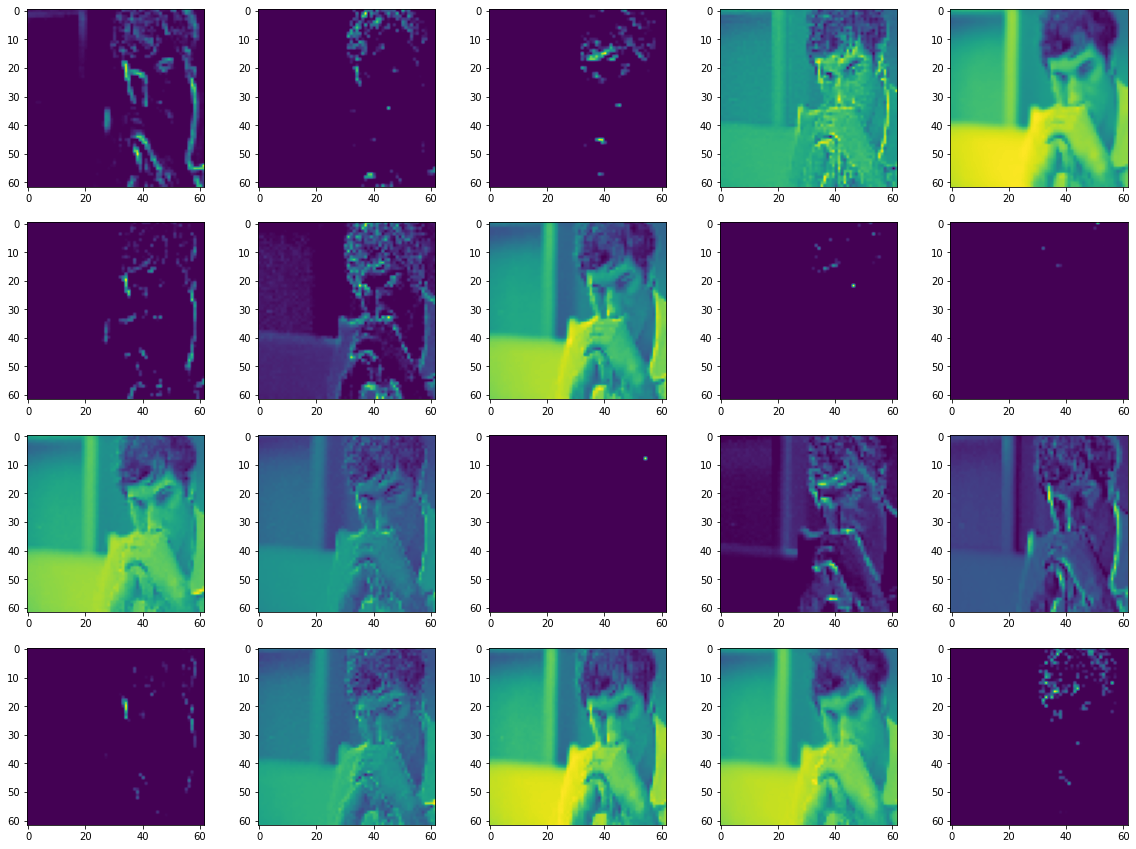

In [67]:
num_rows = 4
num_cols  = 5
#4X4 filter

fig,ax = plt.subplots(ncols=num_cols,nrows=num_rows,figsize=(20,15))

for idx,ax_idx in enumerate(list(itertools.product(range(num_cols),range(num_rows)))):
    ax[ax_idx[1],ax_idx[0]].imshow(yhat[0,:,:,idx])
    
#maxpooling condense info being passed to next layer